### Sobre
DataFrame: https://www.kaggle.com/datasets/dev0914sharma/customer-clustering]

Entendimento de clientes usuários de um cartão de crédito


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('segmentation data.csv')
dados.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
dados.shape

(2000, 8)

In [4]:
#removendo a coluna id
dados = dados.drop('ID', axis = 1)

In [5]:
dados.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [6]:
dados['Marital status'].value_counts()

0    1007
1     993
Name: Marital status, dtype: int64

In [7]:
dados['Occupation'].value_counts()

1    1113
0     633
2     254
Name: Occupation, dtype: int64

In [8]:
dados['Settlement size'].value_counts()

0    989
1    544
2    467
Name: Settlement size, dtype: int64

In [9]:
dados.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [10]:
dados.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


### Analitics dos dados
conhecendo um pouco mais

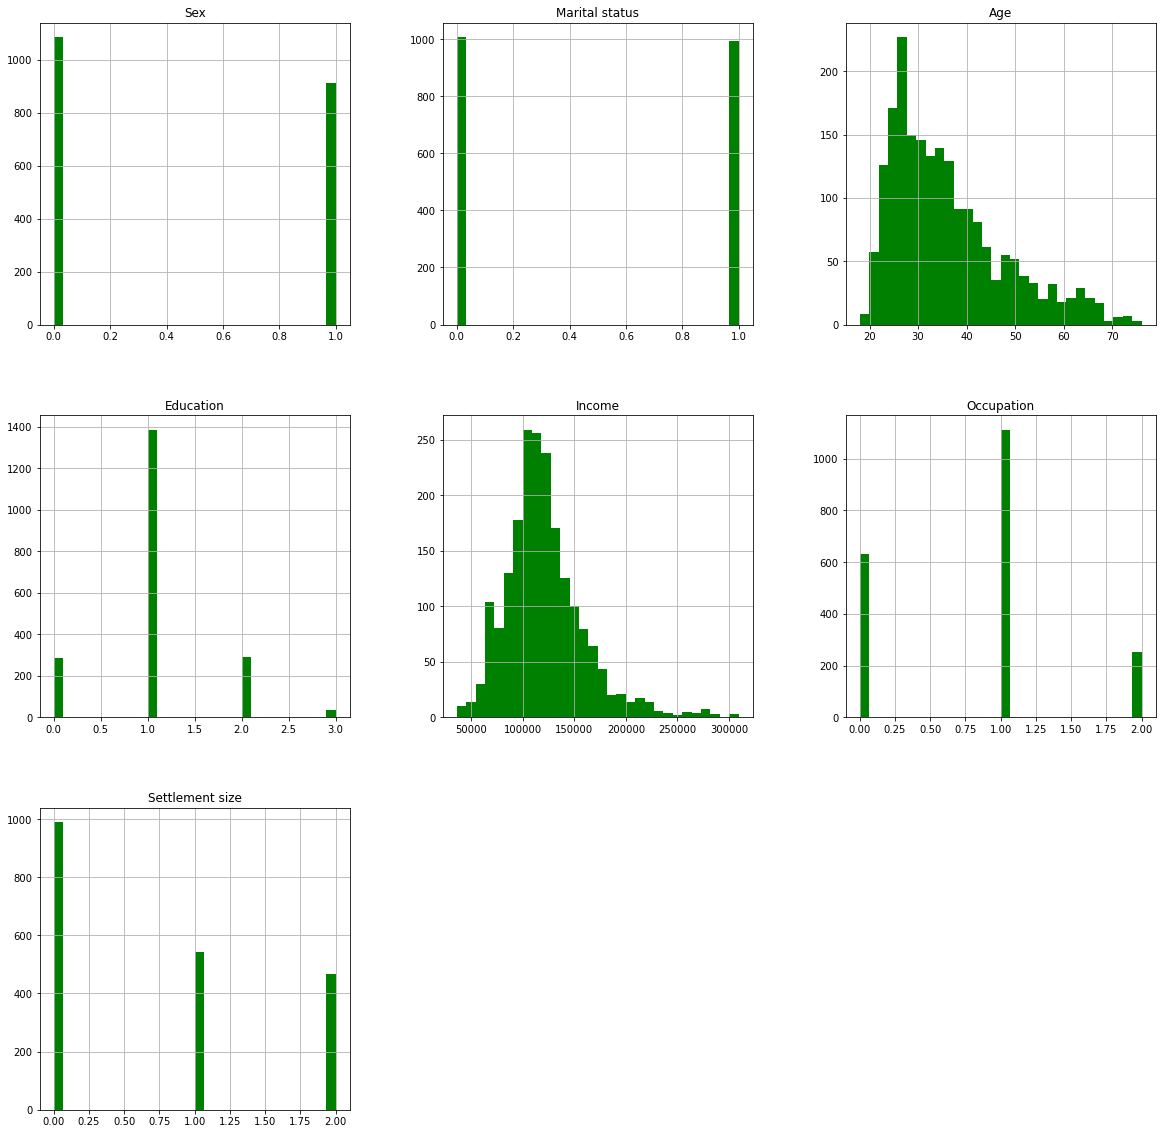

In [11]:
dados.hist(bins=30, figsize=(20,20), color = 'g');

In [12]:
corr = dados.corr()

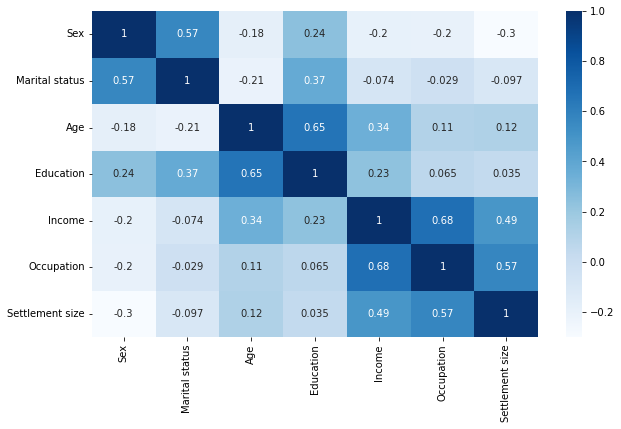

In [13]:
ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr, annot = True, cmap='Blues');

### Normalizando os dados

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dados_scaler = scaler.fit_transform(dados)

In [15]:
#dados_scaler é um np.ndarray
type(dados_scaler)

numpy.ndarray

In [16]:
#regra do cotovelo para encontrar o número ideal de clusters
from sklearn.cluster import KMeans

wcss = []
for k in range(1,20):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(dados_scaler)
    wcss.append(kmeans.inertia_)


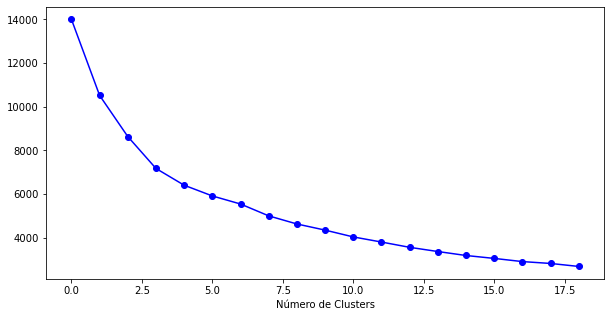

In [17]:
#visualmente temos 4 clusters, o número ideal
plt.figure(figsize=(10,5))
plt.plot(wcss, color='blue', marker='o')
plt.xlabel('Número de Clusters');

In [18]:
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(dados_scaler)
labels = kmeans.labels_

In [19]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [dados.columns])

In [20]:
cluster_centers

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
1,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
2,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
3,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


In [21]:
#já temos os centros dos clusters, vamos desfazer a normalização
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [dados.columns])
cluster_centers

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [29]:
#calculo do silhouette
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(dados_scaler, labels, metric='euclidean')
print(silhouette)

0.26879180394522123


### Aplicação do PCA

Análise de componentes principais (PCA)

Redução de dimensionalidade linear usando Decomposição de Valor Singular dos dados para projetá-lo para um espaço dimensional inferior


In [22]:
#redução para duas dimensões
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
princ_comp = pca.fit_transform(dados_scaler)
princ_comp

array([[ 2.51474593,  0.83412239],
       [ 0.34493528,  0.59814564],
       [-0.65106267, -0.68009318],
       ...,
       [-1.45229829, -2.23593665],
       [-2.24145254,  0.62710847],
       [-1.86688505, -2.45467234]])

In [23]:
pca_df = pd.DataFrame(data = princ_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,2.514746,0.834122
1,0.344935,0.598146
2,-0.651063,-0.680093
3,1.714316,-0.579927
4,1.626745,-0.440496


In [24]:
#concatenando com o número do cluster
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,2.514746,0.834122,0
1,0.344935,0.598146,2
2,-0.651063,-0.680093,1
3,1.714316,-0.579927,3
4,1.626745,-0.440496,3


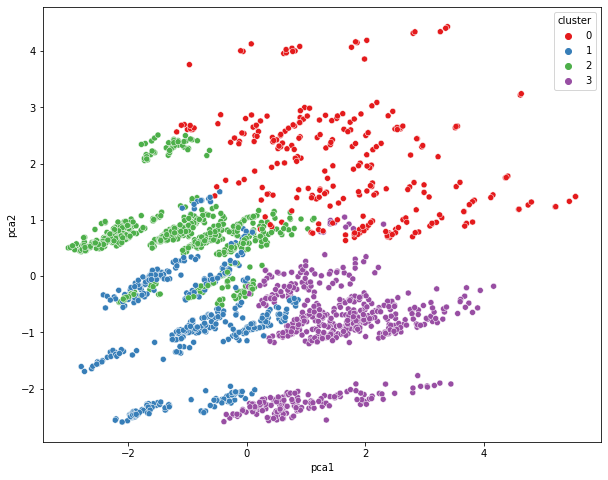

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data = pca_df, palette = 'Set1');

In [26]:
#concatenando o DF com o cluster
dados = pd.concat([dados, pd.DataFrame({'cluster': labels})], axis = 1)
dados.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,2
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3


In [27]:
dados.cluster.value_counts()

2    705
3    570
1    462
0    263
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='count'>

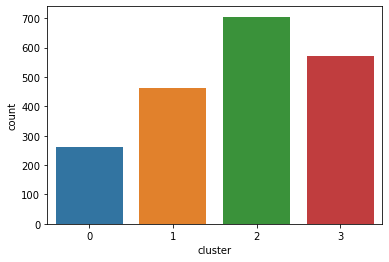

In [28]:
#plotando a quantidade total por cluster
sns.countplot(x='cluster', data=dados)